# Ringkasan Berita Tempo: Extractive Text Summarization Berbasis TextRank


## Business Understanding


Banyak sekali berita online yang tersebar pada dunia maya, tapi untuk mendapatkan info penting dari berita tersebut dengan cepat. Kita membutuhkan cara otomatis untuk mengambil inti sari dari tumpukan berita yang ada.

Tujuan dari proyek ini adalah membuat sistem yang bisa secara otomatis menghasilkan ringkasan singkat dan akurat dari artikel berita panjang.


## Data Understanding


Data yang digunakan merupakan sekumpulan berita dari kanal tempo, data tersebut bisa diakses melalui link kaggle: https://www.kaggle.com/datasets/rizkia14/berita-indo/data. Dataset berisikan kurang lebih 100,000-an data dan memiliki 4 kolom atau fitur diantarnya:

- content: Berisikan isi dari konten berita.
- datetime: Tanggal posting berita.
- tags: Kata kunci berita.
- title: Judul berita


In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("rizkia14/berita-indo")

print("Path to dataset files:", path)
df = pd.read_csv(path + "/tempo Jun19 May20.csv", delimiter=';')

df

Path to dataset files: /kaggle/input/berita-indo


,content,datetime,tags,title
0,", - Kapten Supardi Nasir berharap Kompetisi ...","1,59094E+12","Persib Bandung,Persib,Supardi Nasir,Liga 1",\r\n\t\t\t\t\t\t\tKapten Persib Bandung Harapk...
1,", - Borussia Moenchengladbach menyodok ke per...","1,59094E+12","Bundesliga,Borussia Moenchengladbach,Liga Jerman","\r\n\t\t\t\t\t\t\tBundesliga, Borussia Moenche..."
2,", - Gelandang incaran , Saul Niguez, memberi ...","1,59094E+12","Manchester United,Saul Niguez,Atletico Madrid,...",\r\n\t\t\t\t\t\t\tSaul Beri Sinyal Tinggalkan ...
3,", - Joshua Denson, seorang dokter, mengungkap...","1,59094E+12","Paru-paru,Corona,COVID-19,SARS-CoV-2,Protein ACE2","\r\n\t\t\t\t\t\t\tTak Cuma di Paru-paru, Ini G..."
4,", -Sebanyak 46 lokasi di Jakarta disemprot ca...","1,59094E+12","disinfektan,Damkar ,Corona","\r\n\t\t\t\t\t\t\tCegah Corona, 46 Lokasi di J..."
...,...,...,...,...
117346,", - Penjaga gawang ketiga , Robert Green, dip...","1,55933E+12","Chelsea,Liga Eropa","\r\n\t\t\t\t\t\t\tTak Pernah Main, Angkat Trof..."
117347,", -Wakil Sekretaris Jenderal Partai Demokrat ...","1,55932E+12","Ani Yudhoyono,Partai Demokrat,SBY",\r\n\t\t\t\t\t\t\tPartai Demokrat Bantah Kabar...
117348,", -Badan Meteorologi Klimatologi dan Geofisik...","1,55932E+12","Gelombang Tinggi,BMKG,Lebaran,Pelni",\r\n\t\t\t\t\t\t\tH-4 Lebaran Ada Gelombang Ti...
117349,", -Menteri Dalam Negeri akan menghadiri pema...","1,55932E+12","Tjahjo Kumolo,Kemendagri,Hari Sabarno",\r\n\t\t\t\t\t\t\tHari Ini Mendagri Tjahjo Kum...


### Informasi Dataset


In [ ]:
df.describe()

,content,datetime,tags,title
count,117351,117351,117348,117351
unique,117351,3151,106797,117299
top,", - Hasil Pemeriksaan Badan Laboratorium Fore...","1,57709E+12","Harga Emas,Antam,Emas",\r\n\t\t\t\t\t\t\tJadwal Bola Akhir Pekan: Lig...
freq,1,101,59,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117351 entries, 0 to 117350
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   content   117351 non-null  object
 1   datetime  117351 non-null  object
 2   tags      117348 non-null  object
 3   title     117351 non-null  object
dtypes: object(4)
memory usage: 3.6+ MB


### Missing Value


In [ ]:
df.isna().sum()

,0
content,0
datetime,0
tags,3
title,0


In [ ]:
# Menghapus missing value
df.dropna(inplace=True)
print(df.isna().sum())

content     0
datetime    0
tags        0
title       0
dtype: int64


### Wordcloud


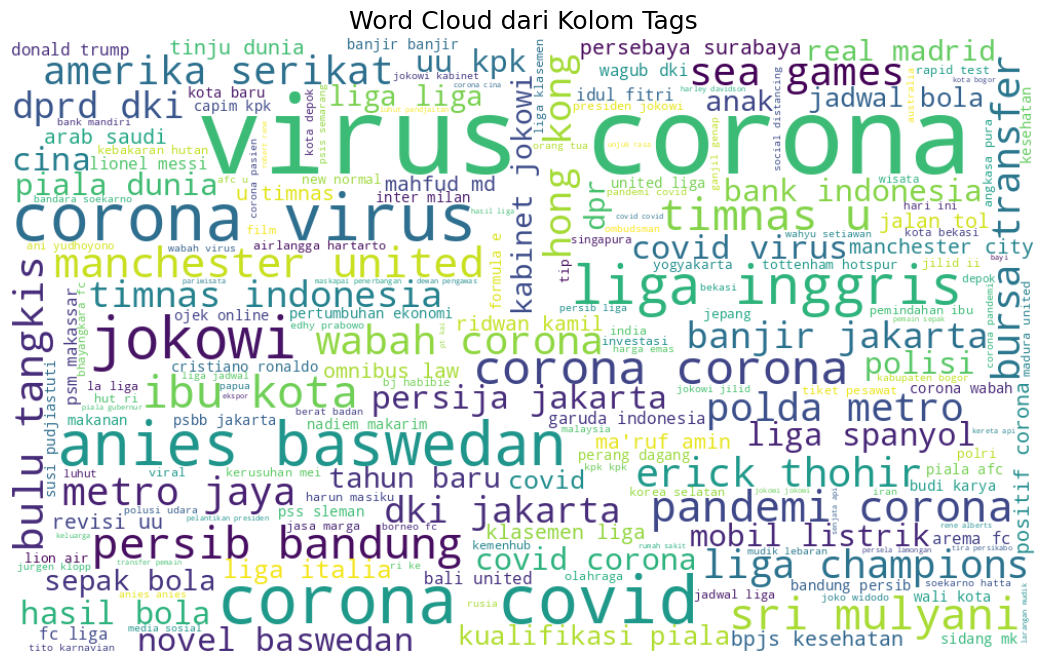

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua tags menjadi satu string besar
all_tags = ",".join(df['tags'].dropna()).lower()

# Split string dan hitung kemunculan
tag_list = all_tags.split(",")
tag_string = " ".join(tag_list)

# WordCloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(tag_string)


plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud dari Kolom Tags", fontsize=18)
plt.show()

### Distribusi Kata


                 Kata  Jumlah
12028    virus corona   10435
11876    corona covid    2532
12345    corona virus    2368
12339  anies baswedan    2060
141            jokowi    1868
...               ...     ...
10922       chevening       1
10921         koroner       1
10920       babilonia       1
10919         perisic       1
10918         shinkai       1

[31942 rows x 2 columns]


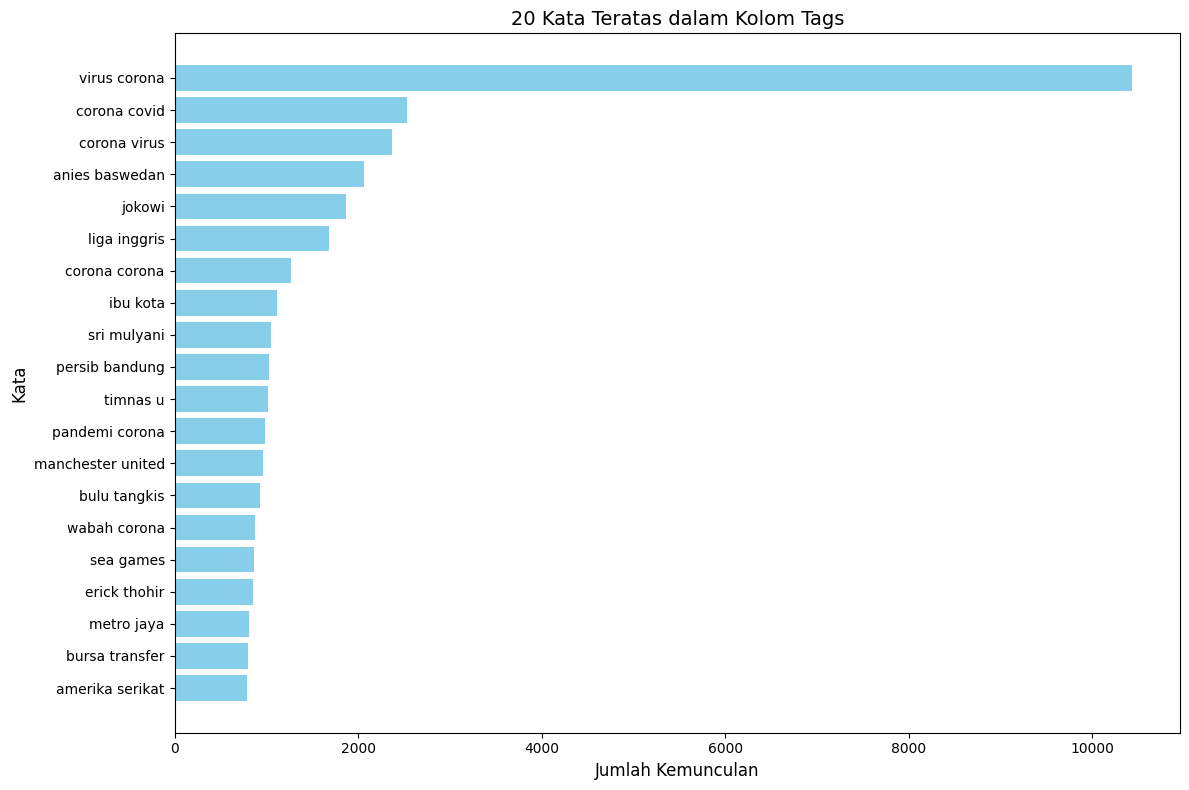

In [ ]:
word_freq = wordcloud.process_text(tag_string)

# Konversi ke DataFrame
df_freq = pd.DataFrame(word_freq.items(), columns=['Kata', 'Jumlah'])
df_freq = df_freq.sort_values(by='Jumlah', ascending=False)

# Tampilkan hasil
print(df_freq)

# Ambil 20 kata teratas
top_n = 20
df_top = df_freq.head(top_n)

# Plot diagram batang
plt.figure(figsize=(12, 8))
plt.barh(df_top['Kata'], df_top['Jumlah'], color='skyblue')
plt.xlabel("Jumlah Kemunculan", fontsize=12)
plt.ylabel("Kata", fontsize=12)
plt.title(f"{top_n} Kata Teratas dalam Kolom Tags", fontsize=14)
plt.gca().invert_yaxis()  # Supaya yang paling besar di atas
plt.tight_layout()
plt.show()


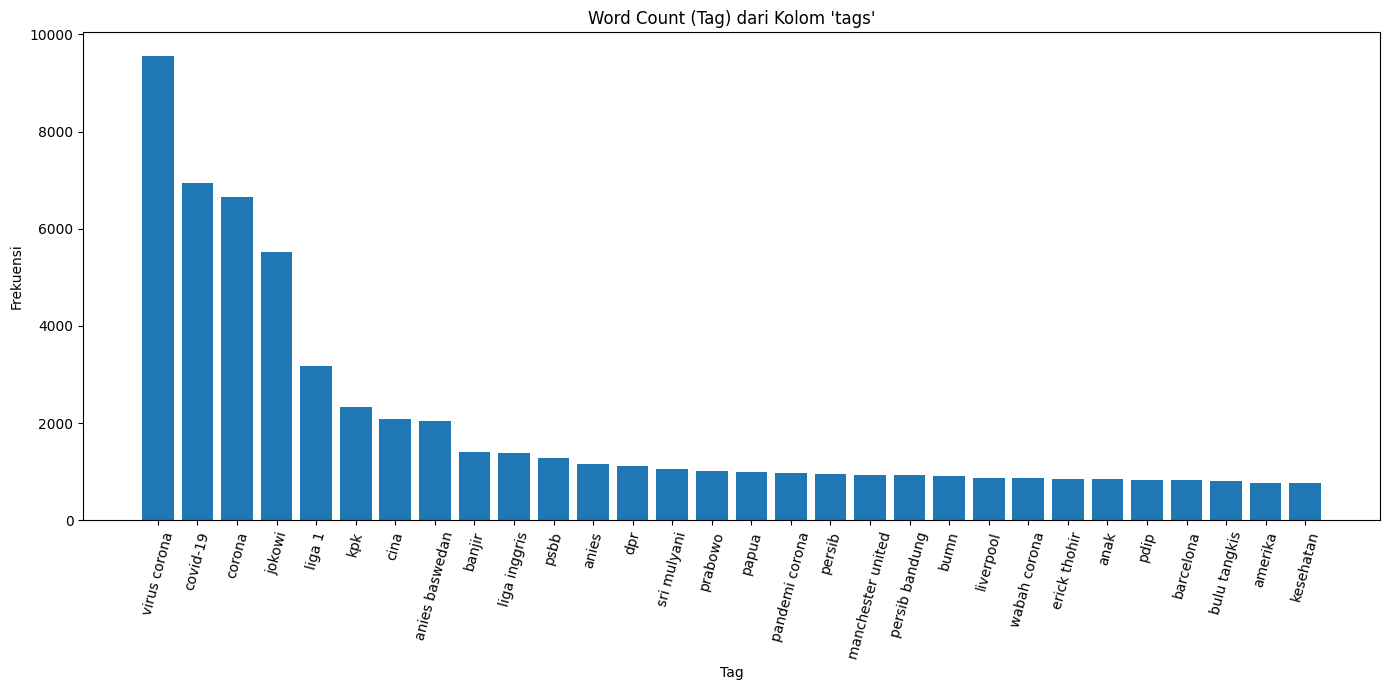

In [ ]:
from collections import Counter

# kolom 'tags', pisahkan dengan koma, dan ubah ke huruf kecil
tags_series = df['tags'].dropna().apply(lambda x: [tag.strip().lower() for tag in x.split(',')])

# Flatten semua tags menjadi satu list
all_tags = [tag for tags in tags_series for tag in tags]

# Hitung frekuensi kemunculan tiap tag
tag_counts = Counter(all_tags)

tag_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Frekuensi'])
tag_df = tag_df.sort_values(by='Frekuensi', ascending=False)

plt.figure(figsize=(14, 7))
plt.bar(tag_df['Tag'][:30], tag_df['Frekuensi'][:30])  # top 30
plt.xticks(rotation=75)
plt.xlabel("Tag")
plt.ylabel("Frekuensi")
plt.title("Word Count (Tag) dari Kolom 'tags'")
plt.tight_layout()
plt.show()


## Data Preparation


- Menghapus karakter escape
- Menghapus spasi berlebih
- Menhapus Karakter tidal perlu
- Merubah format waktu
- Lowercase
- Menghapus Stopword
- Menghapus tanda baca


### Cleaning Text & Konversi Tanggal


In [ ]:
from datetime import datetime
import regex as re
# Function to clean text
def clean_text(text):
    if pd.isnull(text):
        return ""
    # Remove escape characters (\r, \n, \t, \\)
    text = re.sub(r'\\r|\\n|\\t|\\\\', ' ', str(text))
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove leading unwanted chars like ", -", "- ", ", "
    text = re.sub(r'^[,\-\s]+', '', text)
    # Strip leading/trailing whitespace again
    text = text.strip()
    return text

def convert_timestamp(ts):
    try:
        if pd.isnull(ts):
            return ""
        # Replace comma with dot (if any)
        ts_str = str(ts).replace(',', '.')
        # Convert to float
        ts_float = float(ts_str)
        # Convert from milliseconds to seconds
        ts_seconds = ts_float / 1000
        # Convert to datetime
        dt = datetime.fromtimestamp(ts_seconds)
        # Format string
        return dt.strftime('%d-%B-%Y')
    except Exception as e:
        return ""

df['content'] = df['content'].apply(clean_text)
df['title'] = df['title'].apply(clean_text)
df['datetime'] = df['datetime'].apply(convert_timestamp)

df.head()

,content,datetime,tags,title
0,Kapten Supardi Nasir berharap Kompetisi Liga 1...,31-May-2020,"Persib Bandung,Persib,Supardi Nasir,Liga 1",Kapten Persib Bandung Harapkan Liga 1 Kembali ...
1,Borussia Moenchengladbach menyodok ke peringka...,31-May-2020,"Bundesliga,Borussia Moenchengladbach,Liga Jerman","Bundesliga, Borussia Moenchengladbach Naik ke ..."
2,"Gelandang incaran , Saul Niguez, memberi sinya...",31-May-2020,"Manchester United,Saul Niguez,Atletico Madrid,...","Saul Beri Sinyal Tinggalkan Atletico, ke Manch..."
3,"Joshua Denson, seorang dokter, mengungkap peng...",31-May-2020,"Paru-paru,Corona,COVID-19,SARS-CoV-2,Protein ACE2","Tak Cuma di Paru-paru, Ini Gejala Virus Corona..."
4,Sebanyak 46 lokasi di Jakarta disemprot cairan...,31-May-2020,"disinfektan,Damkar ,Corona","Cegah Corona, 46 Lokasi di Jakarta Disemprot D..."


In [ ]:
print(df['content'][0])
print()
print(df['title'][0])
print()
print(df['datetime'][0])
print()
print(df['tags'][0])
print()

Kapten Supardi Nasir berharap Kompetisi Liga 1 segera bisa dilanjutkan. Liga 1 dihentikan sejak Maret lalu setelah pandemi Covid-19 merebak."Memang kita semua tidak bisa apa-apa. Mudah-mudahan kompetisi segera ada kabar. Mudah-mudahan bisa kembali bergulir," ujar Supardi seperti dilansir laman resmi klub, Ahad 31 Mei 2020.Sebelumnya PSSI bersama klub-klub Liga 1 dan Liga 2 telah menggelar rapat virtual, meminta usulan mengenai kelanjutan kompetisi. Usulan yang muncul pun beragam, ada yang meminta dilanjutkan maupun menolak dengan alasan keselamatan.Sejumlah usulan yang mencuat itu akan dibawa PSSI untuk dibahas dalam rapat Komite Eksekutif dalam waktu dekat. Persib sendiri mengusulkan agar kompetisi bisa dilanjutkan disertai syarat adanya negosiasi gaji baru.Supardi menyatakan bahwa sebagai pemain dirinya ingin ada kejelasan. Dia menyatakan akan mematuhi apa pun keputusan yang nantinya diambil."Secara pribadi, kami sebagai pemain ingin ada kejelasan. Tapi semuanya perlu pertimbangan ma

### Segmentasi Kalimat


In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize

def segment_sentences(text):
  return sent_tokenize(text)

df['content_sentences'] = df['content'].apply(segment_sentences)

print(df['content_sentences'][0])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['Kapten Supardi Nasir berharap Kompetisi Liga 1 segera bisa dilanjutkan.', 'Liga 1 dihentikan sejak Maret lalu setelah pandemi Covid-19 merebak.', '"Memang kita semua tidak bisa apa-apa.', 'Mudah-mudahan kompetisi segera ada kabar.', 'Mudah-mudahan bisa kembali bergulir," ujar Supardi seperti dilansir laman resmi klub, Ahad 31 Mei 2020.Sebelumnya PSSI bersama klub-klub Liga 1 dan Liga 2 telah menggelar rapat virtual, meminta usulan mengenai kelanjutan kompetisi.', 'Usulan yang muncul pun beragam, ada yang meminta dilanjutkan maupun menolak dengan alasan keselamatan.Sejumlah usulan yang mencuat itu akan dibawa PSSI untuk dibahas dalam rapat Komite Eksekutif dalam waktu dekat.', 'Persib sendiri mengusulkan agar kompetisi bisa dilanjutkan disertai syarat adanya negosiasi gaji baru.Supardi menyatakan bahwa sebagai pemain dirinya ingin ada kejelasan.', 'Dia menyatakan akan mematuhi apa pun keputusan yang nantinya diambil.', '"Secara pribadi, kami sebagai pemain ingin ada kejelasan.', 'Tapi

### Lower Case


In [ ]:
# Apply lowercase to each sentence in the list
def lowercase_sentences(sentences):
        return [sentence.lower() for sentence in sentences]

df['content_sentences'] = df['content_sentences'].apply(lowercase_sentences)

# Display a sample
print(df['content_sentences'][0])

['kapten supardi nasir berharap kompetisi liga 1 segera bisa dilanjutkan.', 'liga 1 dihentikan sejak maret lalu setelah pandemi covid-19 merebak.', '"memang kita semua tidak bisa apa-apa.', 'mudah-mudahan kompetisi segera ada kabar.', 'mudah-mudahan bisa kembali bergulir," ujar supardi seperti dilansir laman resmi klub, ahad 31 mei 2020.sebelumnya pssi bersama klub-klub liga 1 dan liga 2 telah menggelar rapat virtual, meminta usulan mengenai kelanjutan kompetisi.', 'usulan yang muncul pun beragam, ada yang meminta dilanjutkan maupun menolak dengan alasan keselamatan.sejumlah usulan yang mencuat itu akan dibawa pssi untuk dibahas dalam rapat komite eksekutif dalam waktu dekat.', 'persib sendiri mengusulkan agar kompetisi bisa dilanjutkan disertai syarat adanya negosiasi gaji baru.supardi menyatakan bahwa sebagai pemain dirinya ingin ada kejelasan.', 'dia menyatakan akan mematuhi apa pun keputusan yang nantinya diambil.', '"secara pribadi, kami sebagai pemain ingin ada kejelasan.', 'tapi

### Menghapus Tanda Baca


In [ ]:
import string

def remove_punctuation(sentences):
    return ["".join([char for char in sentence if char not in string.punctuation]) for sentence in sentences]

df['content_sentences'] = df['content_sentences'].apply(remove_punctuation)

print(df['content_sentences'][0])

['kapten supardi nasir berharap kompetisi liga 1 segera bisa dilanjutkan', 'liga 1 dihentikan sejak maret lalu setelah pandemi covid19 merebak', 'memang kita semua tidak bisa apaapa', 'mudahmudahan kompetisi segera ada kabar', 'mudahmudahan bisa kembali bergulir ujar supardi seperti dilansir laman resmi klub ahad 31 mei 2020sebelumnya pssi bersama klubklub liga 1 dan liga 2 telah menggelar rapat virtual meminta usulan mengenai kelanjutan kompetisi', 'usulan yang muncul pun beragam ada yang meminta dilanjutkan maupun menolak dengan alasan keselamatansejumlah usulan yang mencuat itu akan dibawa pssi untuk dibahas dalam rapat komite eksekutif dalam waktu dekat', 'persib sendiri mengusulkan agar kompetisi bisa dilanjutkan disertai syarat adanya negosiasi gaji barusupardi menyatakan bahwa sebagai pemain dirinya ingin ada kejelasan', 'dia menyatakan akan mematuhi apa pun keputusan yang nantinya diambil', 'secara pribadi kami sebagai pemain ingin ada kejelasan', 'tapi semuanya perlu pertimban

### Menghapus Stopwords


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Function to remove stopwords from a list of sentences
def remove_stopwords(sentences):
        processed_sentences = []
        for sentence in sentences:
            words = sentence.split()
            filtered_words = [word for word in words if word not in indonesian_stopwords]
            processed_sentences.append(" ".join(filtered_words))
        return processed_sentences

df['prep_result'] = df['content_sentences'].apply(remove_stopwords)

# Display a sample
print(df['prep_result'][0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['kapten supardi nasir berharap kompetisi liga 1 dilanjutkan', 'liga 1 dihentikan maret pandemi covid19 merebak', 'apaapa', 'mudahmudahan kompetisi kabar', 'mudahmudahan bergulir supardi dilansir laman resmi klub ahad 31 mei 2020sebelumnya pssi klubklub liga 1 liga 2 menggelar rapat virtual usulan kelanjutan kompetisi', 'usulan muncul beragam dilanjutkan menolak alasan keselamatansejumlah usulan mencuat dibawa pssi dibahas rapat komite eksekutif', 'persib mengusulkan kompetisi dilanjutkan disertai syarat negosiasi gaji barusupardi pemain kejelasan', 'mematuhi keputusan diambil', 'pribadi pemain kejelasan', 'pertimbangan matang', 'mengikuti terbaik supardipersib latihan rabu kemamrin', 'pelatih persib robert rene alberts mengaku puas kondisi kebugaran pemain pascalibur idul fitri', 'menurutnya penggawa pangeran biru kondisi fit', 'berkomunikasi pemain kondisi', 'perhitungan berat badan hasilnya simpan data pemain kondisi katanyaselama program latihan mandiri robert laporan pemain daring

In [ ]:
df['prep_result'][0]

['kapten supardi nasir berharap kompetisi liga 1 dilanjutkan',
 'liga 1 dihentikan maret pandemi covid19 merebak',
 'apaapa',
 'mudahmudahan kompetisi kabar',
 'mudahmudahan bergulir supardi dilansir laman resmi klub ahad 31 mei 2020sebelumnya pssi klubklub liga 1 liga 2 menggelar rapat virtual usulan kelanjutan kompetisi',
 'usulan muncul beragam dilanjutkan menolak alasan keselamatansejumlah usulan mencuat dibawa pssi dibahas rapat komite eksekutif',
 'persib mengusulkan kompetisi dilanjutkan disertai syarat negosiasi gaji barusupardi pemain kejelasan',
 'mematuhi keputusan diambil',
 'pribadi pemain kejelasan',
 'pertimbangan matang',
 'mengikuti terbaik supardipersib latihan rabu kemamrin',
 'pelatih persib robert rene alberts mengaku puas kondisi kebugaran pemain pascalibur idul fitri',
 'menurutnya penggawa pangeran biru kondisi fit',
 'berkomunikasi pemain kondisi',
 'perhitungan berat badan hasilnya simpan data pemain kondisi katanyaselama program latihan mandiri robert laporan

### Menggabungkan text/kalimat


In [ ]:
# Convert the lists of sentences to strings by joining them
def join_sentences(sentences):
        return " ".join(sentences)

# Create a new column with joined sentences
df['prep_result_joined'] = df['prep_result'].apply(join_sentences)


## Modeling


In [ ]:
article_idx = 56  # Change this to summarize different articles
article_sentences = df['content_sentences'].iloc[article_idx]
processed_sentences = df['prep_result'].iloc[article_idx]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### TF-IDF


In [ ]:
# TF-IDF vectors for each sentence
sentence_vectorizer = TfidfVectorizer()
sentence_vectors = sentence_vectorizer.fit_transform(processed_sentences)

### Cosine Similarity


In [ ]:
# Similarity between sentences
sentence_sim = cosine_similarity(sentence_vectors, sentence_vectors)
df_sentence_sim = pd.DataFrame(sentence_sim, index=processed_sentences, columns=processed_sentences)
df_sentence_sim

,tempoco jakarta maskapai pelat merah garuda indonesia protokol normal aktivitas penerbangan pandemi corona,salah protokol kesehatan dijalankan menjaga jarak fisik menjauhkan jarak kursi antarpenumpang,penerapan jaga jarak kursi penumpang prioritas kenyamanan penerbangan direktur utama indonesia irfan setiaputra media sosial instagramnya setiaputrairfan ahad 31 mei 2020,unggahannya irfan menyertakan potret kabin garuda terisi,foto kursi lajur dikosongkan,kursi terisi penumpang tau lorong jendela,penumpang mengenakan irfan kebijakan salah bentuk kenyamanan penumpang garuda melakoni perjalanan transportasi udara pandemi,kenormalan terlaksana,menyuguhkan kenyamanan,operator transportasi pandemi,garuda indonesia pt kereta api indonesia mengumumkan persiapannya pelayanan tatanan anyar,vice president public relations joni martinus perseroan mengurangi kontak fisik menerapkan protokol kesehatan,“pedoman melindungi pegawai pelanggan terpapar covid19 ” joni 29 mei 2020,joni pedoman mengacu keputusan menteri kesehatan no hk0107menkes3282020 panduan pencegahan pengendalian covid19 kerja perkantoran industri mendukung keberlangsungan usaha situasi,pedoman joni diimplementasikan kereta api jarak reguler beroperasi
tempoco jakarta maskapai pelat merah garuda indonesia protokol normal aktivitas penerbangan pandemi corona,1.000000,0.058292,0.096699,0.061386,0.000000,0.000000,0.094202,0.0,0.000000,0.117733,0.158042,0.053391,0.000000,0.000000,0.000000
salah protokol kesehatan dijalankan menjaga jarak fisik menjauhkan jarak kursi antarpenumpang,0.058292,1.000000,0.129744,0.000000,0.085186,0.072313,0.069642,0.0,0.000000,0.000000,0.000000,0.186438,0.000000,0.046387,0.155604
penerapan jaga jarak kursi penumpang prioritas kenyamanan penerbangan direktur utama indonesia irfan setiaputra media sosial instagramnya setiaputrairfan ahad 31 mei 2020,0.096699,0.129744,1.000000,0.058926,0.062648,0.117900,0.163156,0.0,0.112637,0.000000,0.088359,0.000000,0.123797,0.000000,0.057217
unggahannya irfan menyertakan potret kabin garuda terisi,0.061386,0.000000,0.058926,1.000000,0.000000,0.141610,0.129485,0.0,0.000000,0.000000,0.063262,0.000000,0.000000,0.000000,0.000000
foto kursi lajur dikosongkan,0.000000,0.085186,0.062648,0.000000,1.000000,0.119902,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kursi terisi penumpang tau lorong jendela,0.000000,0.072313,0.117900,0.141610,0.119902,1.000000,0.156131,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
penumpang mengenakan irfan kebijakan salah bentuk kenyamanan penumpang garuda melakoni perjalanan transportasi udara pandemi,0.094202,0.069642,0.163156,0.129485,0.000000,0.156131,1.000000,0.0,0.135866,0.252674,0.043790,0.000000,0.000000,0.000000,0.000000
kenormalan terlaksana,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
menyuguhkan kenyamanan,0.000000,0.000000,0.112637,0.000000,0.000000,0.000000,0.135866,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
operator transportasi pandemi,0.117733,0.000000,0.000000,0.000000,0.000000,0.000000,0.252674,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Graph


In [ ]:
import networkx as nx

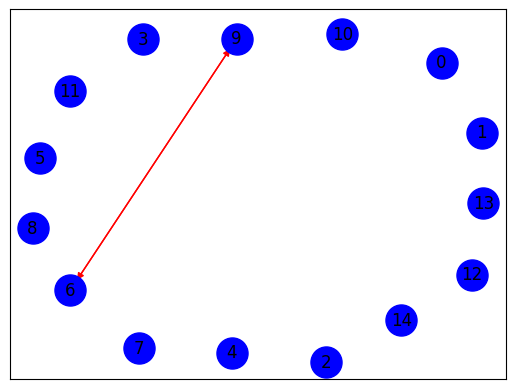

In [ ]:
sentence_graph = nx.DiGraph()
for i in range(len(sentence_sim)):
    sentence_graph.add_node(i)

# Add edges between sentences with similarity > threshold
for i in range(len(sentence_sim)):
    for j in range(len(sentence_sim)):
        if i != j and sentence_sim[i][j] > 0.2:  # Threshold
            sentence_graph.add_edge(i, j, weight=sentence_sim[i][j])

pos = nx.spring_layout(sentence_graph, k=2)
nx.draw_networkx_nodes(sentence_graph, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(sentence_graph, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(sentence_graph, pos)

plt.show()

### PageRank


In [ ]:
# Compute PageRank for the sentences
sentence_scores = nx.pagerank(sentence_graph)
ranked_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)

# Display the top sentences (preserving original order)
top_sentence_indices = sorted([idx for idx, score in ranked_sentences[:3]])
summary = [article_sentences[i] for i in top_sentence_indices]

print(f"Original article title: {df['title'].iloc[article_idx]}")
print(f"Original length: {len(article_sentences)} sentences")
print("\nSummary:")
for sentence in summary:
    print(f"- {sentence}")

Original article title: Persiapan New Normal, Garuda Atur Jarak Kursi Penumpang
Original length: 15 sentences

Summary:
- tempoco jakarta  maskapai pelat merah garuda indonesia tengah menyiapkan protokol normal baru atau untuk aktivitas penerbangan di tengah pandemi corona
- semua penumpang pun terlihat mengenakan menurut irfan kebijakan ini merupakan salah satu bentuk kenyamanan baru bagi penumpang garuda saat melakoni perjalanan dengan transportasi udara di tengah pandemi
- sejumlah operator transportasi memang sedang menyiapkan di tengah pandemi


## Evaluasi


### ROUGE-N & ROUGE-L


In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=7bac56682da79404bae66b21ac6fd12718fd17713c65dc558e1da2051bfdfd2a
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [ ]:
from rouge_score import rouge_scorer

In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'])

def calculate_rouge(reference, summary):
	scores = scorer.score(reference, summary)
	return scores

reference = " ".join(df['content_sentences'].iloc[article_idx])
summary = " ".join(summary)
rouge_scores = calculate_rouge(reference, summary)
print("ROUGE Scores:")
print(f"ROUGE-1: {rouge_scores['rouge1']}")
print(f"ROUGE-2: {rouge_scores['rouge2']}")
print(f"ROUGE-L: {rouge_scores['rougeL']}")

ROUGE Scores:
ROUGE-1: Score(precision=1.0, recall=0.2196078431372549, fmeasure=0.360128617363344)
ROUGE-2: Score(precision=0.9636363636363636, recall=0.20866141732283464, fmeasure=0.343042071197411)
ROUGE-L: Score(precision=1.0, recall=0.2196078431372549, fmeasure=0.360128617363344)


## Summarize batch


In [ ]:
import time
import networkx as nx
from tqdm.notebook import tqdm
import numpy as np
import gc
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def generate_summary(sentences, processed_sentences, num_sentences=3):
    # If we have fewer sentences than requested or empty input, handle appropriately
    if not sentences or not processed_sentences or len(sentences) <= num_sentences:
        return sentences or []

    try:
        # Create TF-IDF vectors for each sentence
        vectorizer = TfidfVectorizer()
        sentence_vectors = vectorizer.fit_transform(processed_sentences)

        # Compute similarity between sentences
        similarity_matrix = cosine_similarity(sentence_vectors, sentence_vectors)

        # Create a graph and apply PageRank
        nx_graph = nx.from_numpy_array(similarity_matrix)
        scores = nx.pagerank(nx_graph, alpha=0.85, max_iter=100)

        # Rank sentences by score
        ranked_sentences = sorted(((scores[i], i, s) for i, s in enumerate(sentences)),
                                  reverse=True)

        # Get the top sentences (preserving original order)
        top_sentence_indices = sorted([item[1] for item in ranked_sentences[:num_sentences]])
        summary = [sentences[i] for i in top_sentence_indices]

        return summary
    except Exception as e:
        print(f"Error processing document: {str(e)}")
        # If an error occurs, return first few sentences as fallback
        return sentences[:min(num_sentences, len(sentences))]


# Batch processing function
def batch_summarize(dataframe, batch_size=1000, num_sentences=3):
    """Process the entire dataframe in batches to avoid memory errors"""
    num_docs = len(dataframe)
    num_batches = int(np.ceil(num_docs / batch_size))
    all_summaries = []

    print(f"Processing {num_docs} documents in {num_batches} batches...")

    start_time = time.time()

    for batch_num in tqdm(range(num_batches)):
        # Get batch indices
        start_idx = batch_num * batch_size
        end_idx = min((batch_num + 1) * batch_size, num_docs)

        # Process each document in the batch
        batch_summaries = []
        for idx in range(start_idx, end_idx):
            sentences = dataframe['content_sentences'].iloc[idx]
            processed_sentences = dataframe['prep_result'].iloc[idx]

            # Generate summary
            doc_summary = generate_summary(sentences, processed_sentences, num_sentences)

            # Join the summary sentences
            summary_text = " ".join(doc_summary) if doc_summary else ""
            batch_summaries.append(summary_text)

        # Extend the main list with this batch's summaries
        all_summaries.extend(batch_summaries)

        # Force garbage collection to free memory
        gc.collect()

        # Optional: save checkpoint after each batch
        if batch_num % 10 == 0 and batch_num > 0:
            with open(f'summaries_checkpoint_{batch_num}.pkl', 'wb') as f:
                pickle.dump(all_summaries, f)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Finished summarizing {len(all_summaries)} documents in {elapsed_time:.2f} seconds")

    return all_summaries

num_sentences_per_summary = 3
batch_size = 5000
# Process all documents
print(f"Starting summarization with batch size={batch_size}, sentences per summary={num_sentences_per_summary}")
summaries = batch_summarize(df, batch_size=batch_size, num_sentences=num_sentences_per_summary)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df['summary'] = summaries
df_colab = pd.read_csv(path + "/tempo Jun19 May20.csv", delimiter=';')
df_colab.dropna(inplace=True)
df_colab['summary'] = summaries
df_colab.to_csv('/content/drive/MyDrive/Tugas/Semester 6/Text Mining/tempo_with_summaries.csv', index=False)

## BM25


In [ ]:
!pip install PySastrawi
!pip install whoosh_reloaded

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 551.8/551.8 kB 14.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import datetime
import regex as re
import string

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize

# Function to clean text
def clean_text(text):
    if pd.isnull(text):
        return ""
    if isinstance(text, bytes):
          text = text.decode('utf-8', errors='replace')
    # Remove escape characters (\r, \n, \t, \\)
    text = re.sub(r'\\r|\\n|\\t|\\\\', ' ', str(text))
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove leading unwanted chars like ", -", "- ", ", "
    text = re.sub(r'^[,\-\s]+', '', text)
    # Strip leading/trailing whitespace again
    text = text.strip()
    return text

def convert_timestamp(ts):
    try:
        # Replace comma with dot (if any)
        ts_str = str(ts).replace(',', '.')
        # Convert to float
        ts_float = float(ts_str)
        # Convert from milliseconds to seconds
        ts_seconds = ts_float / 1000
        # Convert to datetime
        dt = datetime.datetime.fromtimestamp(ts_seconds)
        # Format string
        return dt.strftime('%Y-%m-%d')
        # return dt
    except Exception as e:
        print(e, ts)
        return ""

def segment_sentences(text):
  return sent_tokenize(text)

# Apply lowercase to each sentence in the list
def lowercase_sentences(sentences):
        return [sentence.lower() for sentence in sentences]

def remove_punctuation(sentences):
    return ["".join([char for char in sentence if char not in string.punctuation]) for sentence in sentences]

factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

def remove_stopwords(sentences):
    return [stopword_remover.remove(sentence) for sentence in sentences]

factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemmer_(sentences):
    return [stemmer.stem(sentence) for sentence in sentences]

def join_sentences(sentences):
        return " ".join(sentences)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# from preprocessing import *

from whoosh.index import create_in
from whoosh.fields import *
import os
if not os.path.exists("indexdir"):
    os.mkdir("indexdir")

import kagglehub
import pandas as pd

# Download latest version
# path = kagglehub.dataset_download("rizkia14/berita-indo")

# datasets = "datasets/tempo Jun19 May20.csv"
# df = pd.read_csv(path + "/tempo Jun19 May20.csv", delimiter=';', encoding='utf-8')
df = pd.read_csv('/content/drive/MyDrive/Tugas/Semester 6/Text Mining/tempo_with_summaries.csv', delimiter=',', encoding='utf-8')

df.dropna(inplace=True)

# Preprocessing
df['content'] = df['content'].apply(clean_text)
df['title'] = df['title'].apply(clean_text)
df['datetime'] = df['datetime'].apply(convert_timestamp)

# Tokenisasi
df['content'] = df['content'].astype(str)
df['content_sentences'] = df['content'].apply(segment_sentences)

# Apply lowercase to each sentence in the list
df['content_sentences'] = df['content_sentences'].apply(lowercase_sentences)

# Remove punctuation
df['content_sentences'] = df['content_sentences'].apply(remove_punctuation)

# stemmer
df['content_sentences'] = df['content_sentences'].apply(stemmer_)

# Remove stopwords
df['content_sentences'] = df['content_sentences'].apply(remove_stopwords)

# Join sentences into a single string
df['content_sentences'] = df['content_sentences'].apply(join_sentences)

schema = Schema(
    path=ID(stored=True, unique=True),
    title=TEXT(stored=True),
    original_content=TEXT(stored=True),
    content_processed=TEXT(stored=False),
    tags=KEYWORD(stored=True),
    summarization=TEXT(stored=True),
    datetime=DATETIME(stored=True, sortable=True),
)
ix = create_in("indexdir", schema)
writer = ix.writer()

for i, row in df.iterrows():
    # Clean text
    content = row['content_sentences']
    # Add to index
    writer.add_document(
        path=str(i),
        title=row['title'],
        original_content=row['content'],
        content_processed=content,
        datetime=row['datetime'],
        tags=row['tags'],
        summarization=row['summary']
    )

writer.commit()


AttributeError: 'SegmentWriter' object has no attribute 'close'

In [ ]:
!zip -r indexdir.zip indexdir/

  adding: indexdir/ (stored 0%)
  adding: indexdir/.ipynb_checkpoints/ (stored 0%)
  adding: indexdir/MAIN_92tkepi87q3iwwyb.seg (deflated 24%)
  adding: indexdir/_MAIN_1.toc (deflated 44%)
  adding: indexdir/MAIN_WRITELOCK (stored 0%)


In [ ]:
!mv /content/indexdir.zip "/content/drive/MyDrive/Tugas/Semester 6/Text Mining/"


# Evaluasi: Precision@k

Evaluasi menggunakan metrik **Precision@k** untuk mengukur kualitas hasil pencarian BM25.


In [ ]:
from whoosh.qparser import QueryParser

class SimplePrecisionEvaluator:
    def __init__(self, index):
        self.index = index
        
    def create_test_queries(self):
        """Membuat test queries sederhana untuk evaluasi"""
        test_queries = [
            {
                'query': 'corona virus indonesia',
                'relevant_keywords': ['covid', 'coronavirus', 'pandemi', 'vaksin', 'lockdown', 'virus']
            },
            {
                'query': 'ekonomi indonesia',
                'relevant_keywords': ['ekonomi', 'perdagangan', 'inflasi', 'gdp', 'investasi', 'keuangan']
            },
            {
                'query': 'politik indonesia',
                'relevant_keywords': ['politik', 'pemilu', 'presiden', 'dpr', 'pemerintah', 'menteri']
            },
            {
                'query': 'pendidikan sekolah',
                'relevant_keywords': ['pendidikan', 'sekolah', 'universitas', 'guru', 'siswa', 'belajar']
            },
            {
                'query': 'teknologi digital',
                'relevant_keywords': ['teknologi', 'digital', 'internet', 'aplikasi', 'startup', 'komputer']
            }
        ]
        return test_queries
    
    def search_query(self, query, limit=10):
        """Melakukan pencarian untuk query tertentu"""
        results = []
        
        with self.index.searcher() as s:
            parsed_query = QueryParser("original_content", schema=self.index.schema).parse(query)
            search_results = s.search(parsed_query, limit=limit)
            
            for hit in search_results:
                results.append({
                    'title': hit['title'],
                    'content': hit['original_content'],
                    'score': hit.score
                })
        
        return results
    
    def calculate_precision_at_k(self, results, relevant_keywords, k=5):
        """
        Menghitung Precision@k
        
        Precision@k = (Jumlah dokumen relevan di top-k) / k
        """
        if not results or k <= 0:
            return 0
            
        relevant_found = 0
        top_k_results = results[:k]
        
        for result in top_k_results:
            # Gabungkan title dan content untuk pengecekan
            content_text = (result['title'] + ' ' + result['content']).lower()
            
            # Cek apakah ada keyword yang relevan
            if any(keyword.lower() in content_text for keyword in relevant_keywords):
                relevant_found += 1
        
        precision_k = relevant_found / k
        return precision_k
    
    def evaluate_all_queries(self, k_values=[1, 3, 5, 10]):
        """
        Evaluasi semua test queries untuk berbagai nilai k
        """
        test_queries = self.create_test_queries()
        results = {}
        
        print("🔍 Evaluasi Precision@k untuk BM25")
        print("=" * 50)
        
        # Initialize results dictionary for each k value
        for k in k_values:
            results[f'P@{k}'] = []
        
        # Evaluate each query
        for i, test_query in enumerate(test_queries, 1):
            query = test_query['query']
            relevant_keywords = test_query['relevant_keywords']
            
            print(f"\n📊 Query {i}: '{query}'")
            
            # Perform search with maximum limit needed
            search_results = self.search_query(query, limit=max(k_values))
            
            # Calculate precision for each k value (THIS IS THE K_VALUES ITERATION)
            for k in k_values:
                precision_k = self.calculate_precision_at_k(search_results, relevant_keywords, k)
                results[f'P@{k}'].append(precision_k)
                print(f"   P@{k}: {precision_k:.3f}")
        
        
        return results
    

# Inisialisasi evaluator sederhana
simple_evaluator = SimplePrecisionEvaluator(ix)

In [97]:
# Evaluasi untuk k = 1, 3, 5, 10
results = simple_evaluator.evaluate_all_queries(k_values=[1, 3, 5, 10])

🔍 Evaluasi Precision@k untuk BM25

📊 Query 1: 'corona virus indonesia'
10
   P@1: 1.000
   P@3: 1.000
   P@5: 1.000
   P@10: 1.000

📊 Query 2: 'ekonomi indonesia'
10
   P@1: 1.000
   P@3: 1.000
   P@5: 1.000
   P@10: 1.000

📊 Query 3: 'politik indonesia'
10
   P@1: 1.000
   P@3: 1.000
   P@5: 1.000
   P@10: 1.000

📊 Query 4: 'pendidikan sekolah'
10
   P@1: 1.000
   P@3: 1.000
   P@5: 1.000
   P@10: 1.000

📊 Query 5: 'teknologi digital'
10
   P@1: 1.000
   P@3: 1.000
   P@5: 1.000
   P@10: 1.000


In [94]:
# Uji Query Kustom dengan Precision@k
def test_custom_query_precision(query, relevant_keywords, k_values=[1, 3, 5]):
    """
    Uji query kustom dan hitung Precision@k
    """
    print(f"🔍 Testing Query: '{query}'")
    print("=" * 60)
    
    # Lakukan pencarian
    search_results = simple_evaluator.search_query(query, limit=max(k_values))
    
    print(f"📝 Total hasil ditemukan: {len(search_results)}")
    print(f"🎯 Relevant keywords: {', '.join(relevant_keywords)}")
    
    print(f"\n📊 Hasil Pencarian:")
    for i, result in enumerate(search_results[:5], 1):
        print(f"{i}. [{result['score']:.3f}] {result['title']}")
    
    print(f"\n📈 Precision@k Results:")
    for k in k_values:
        precision_k = simple_evaluator.calculate_precision_at_k(search_results, relevant_keywords, k)
        print(f"   P@{k}: {precision_k:.3f}")
    
    return search_results

# Contoh penggunaan
print("🧪 CONTOH EVALUASI QUERY KUSTOM")
print("\n1. Query tentang teknologi:")
test_custom_query_precision(
    query="artificial intelligence machine learning", 
    relevant_keywords=["ai", "artificial", "intelligence", "machine", "learning", "teknologi", "algoritma"],
    k_values=[1, 3, 5]
)

print("\n2. Query tentang kesehatan:")
test_custom_query_precision(
    query="bola sepak indonesia", 
    relevant_keywords=["indonesia", "bola", "dunia", "timnas", "menang", "piala"],
    k_values=[1, 3, 5]
)

🧪 CONTOH EVALUASI QUERY KUSTOM

1. Query tentang teknologi:
🔍 Testing Query: 'artificial intelligence machine learning'
5
False
📝 Total hasil ditemukan: 5
🎯 Relevant keywords: ai, artificial, intelligence, machine, learning, teknologi, algoritma

📊 Hasil Pencarian:
1. [35.979] BPPT Bangun Pusat Inovasi Kecerdasan Buatan
2. [35.839] Serangan Siber Kini Pakai Bot dengan Kecerdasan Buatan
3. [35.005] Perusahaan Big Data Bonza Raih Pendanaan dari East Ventures
4. [34.045] BPPT Akan Luncurkan Citra Medik Pendeteksi Covid-19 Berbasis AI
5. [33.392] Mahasiswa ITB Luncurkan Website Chatbot untuk Bisnis UMKM

📈 Precision@k Results:
   P@1: 1.000
   P@3: 1.000
   P@5: 1.000

2. Query tentang kesehatan:
🔍 Testing Query: 'bola sepak indonesia'
5
False
📝 Total hasil ditemukan: 5
🎯 Relevant keywords: indonesia, bola, dunia, timnas, menang, piala

📊 Hasil Pencarian:
1. [19.984] Ketua Baru PSSI, Iwan Bule, Harapkan Kedatangan Presiden FIFA
2. [19.809] Hari Ini PSSI Berulang Tahun Ke-90, Begini Kata Iw

[{'title': 'Ketua Baru PSSI, Iwan Bule, Harapkan Kedatangan Presiden FIFA',
  'content': 'Ketua Umum PSSI Periode 2019-2023, Mochamad Iriawan alias , mengatakan telah berkomunikasi dengan Presiden Federasi Sepak Bola Dunia (FIFA) Gianni Infantino usai terpilih menjadi orang nomor satu di induk sepak bola Indonesia. Menurut Iwan Bule, dirinya mendapatkan ucap selama dari Gianni dan berharap sepal bola Indonesia bakal lebih maju. "Beliau sampaikan telah bertemu dengan presiden, Pak Jokowi," kata Iwan Bule di Hotel Shangri-La, Jakarta, Sabtu, 2 November 2019.Ia juga berharap Gianni mau berkunjung langsung ke Indonesia. "Saya bilang saya menunggu Presiden FIFA untuk bisa hadir di sini," kata dia.Selain dengan Gianni, Iwan Bule telah mendapatkan ucapan selamat dari Presiden konfederasi sepak bola Asia (AFC), Shaikh Salman dan Presiden Konfederasi sepak bola Asia Tenggara (AFF) Khiev Sameth. Presiden badan sepak bola dunia (FIFA) Gianni Infantino optimistis sepak bola Indonesia akan bangkit 